In [1]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
import numpy as np
import sys

Using TensorFlow backend.


In [8]:
# convert the model from .json file and apply the weight from HDF5 into it
def loadModel():
    try:
        json = open("cifar10_model.json", "r")
        model_json = json.read()
        json.close()
        model = model_from_json(model_json)
        model.load_weights("cifar10_model.h5")
        return model
    except FileNotFoundError:
        print("No saved models yet! Please create a new network.")
        sys.exit()
        
# Function for numbers == categories
def categoryName(n):
    category = {
        0: "airplane",
        1: "automobile",
        2: "bird",
        3: "cat",
        4: "deer",
        5: "dog",
        6: "frog",
        7: "horse",
        8: "ship",
        9: "truck",
    }
    type = category.get(n)
    return type

# Visualize a small preview of evaluated predictions and their true values in Jupyter notebook or similiar app
def preview(model, img_dimensions, index):
    # @require index <= len(x_test) - 11
    x_train, y_train, x_test, y_test = prepareData()
    fig = plt.figure(figsize=(50, 50))
    for i in range(0, 10):
        image_index = index + i
        sub = fig.add_subplot(10, 1, i + 1)
        pred = model.predict(x_test[image_index].reshape(1, img_dimensions, img_dimensions, 3))
        title = "Subject of the picture is probadly " + categoryName(pred.argmax())
        sub.set_title(title)
        sub.imshow(x_test[image_index].reshape(img_dimensions, img_dimensions, 3), interpolation='nearest')


In [4]:
 def prepareData():
        # Load the data and allocate it into correct matrices.
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
        categories = 10

        # Ensuring that the values are in 32 decimal float
        x_train = x_train.astype("float32")
        x_test = x_test.astype("float32")

        # Z-score normalization
        mean = np.mean(x_train)
        std = np.std(x_train)
        x_train = (x_train - mean) / (std + 1e-7)
        x_test = (x_test - mean) / (std + 1e-7)

        # Allocate validation data into categories to be used with crossentropy
        y_train = np_utils.to_categorical(y_train, categories)
        y_test = np_utils.to_categorical(y_test, categories)

        return (x_train, y_train, x_test, y_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

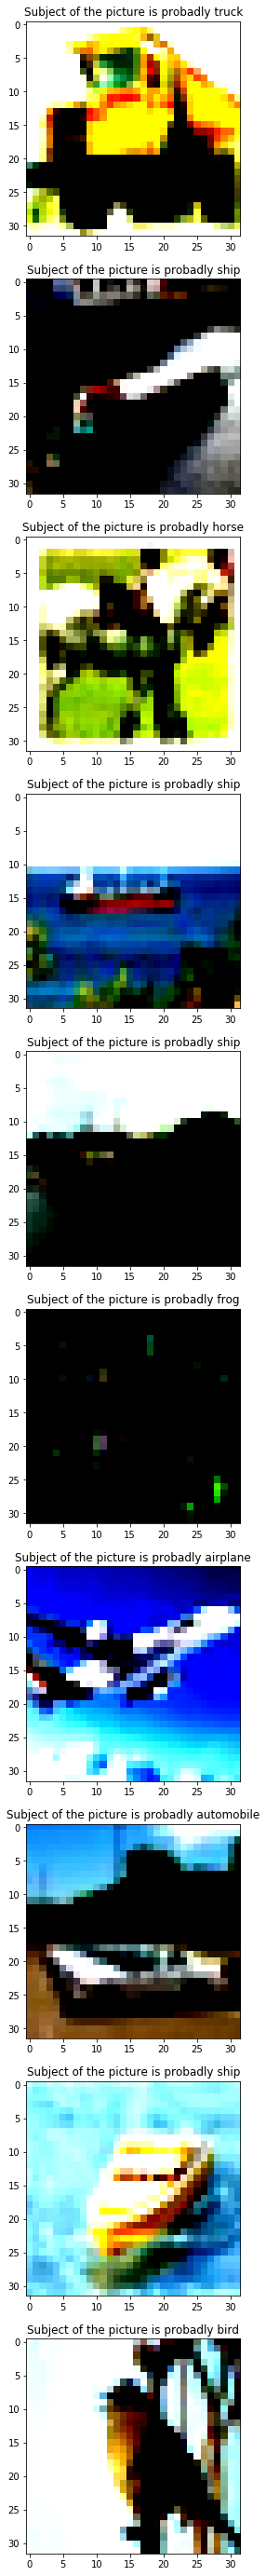

In [13]:
model = loadModel()
preview(model, 32, 400)